In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt  
import seaborn as sns 
import os
from sklearn import datasets
from sklearn.metrics import confusion_matrix, mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_predict  
from math import sqrt  # For squareroot operation

In [2]:
data = pd.read_csv("vol_feature.csv")
data

,S.No,Left-Lateral-Ventricle,Left-Inf-Lat-Vent,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Thalamus,Left-Caudate,Left-Putamen,Left-Pallidum,3rd-Ventricle,...,rh_supramarginal_thickness,rh_frontalpole_thickness,rh_temporalpole_thickness,rh_transversetemporal_thickness,rh_insula_thickness,rh_MeanThickness_thickness,BrainSegVolNotVent.2,eTIV.1,Age,dataset
0,1,22916.9,982.7,15196.7,55796.4,6855.5,2956.4,4240.7,2223.9,2034.4,...,2.408,2.629,3.519,2.009,2.825,2.33635,1093846,1619602.965,85,1
1,2,22953.2,984.5,15289.7,55778.6,6835.1,3064.2,4498.6,2354.1,1927.1,...,2.417,2.640,3.488,2.111,2.720,2.34202,1099876,1624755.130,85,1
2,3,23320.4,1062.1,15382.1,55551.2,7566.0,3231.7,4456.2,1995.4,2064.7,...,2.374,2.601,3.342,2.146,2.684,2.31982,1097999,1622609.518,86,1
3,4,24360.0,1000.5,14805.4,54041.8,8004.6,3137.3,4262.2,1983.4,2017.7,...,2.366,2.639,3.361,2.056,2.700,2.29215,1070117,1583854.236,87,1
4,5,25769.4,1124.4,16331.1,54108.6,6677.4,2964.4,4204.6,2409.7,2251.8,...,2.381,2.555,3.450,2.052,2.574,2.30397,1075926,1617375.362,89,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4221,4222,27065.6,532.4,12425.1,51042.9,6354.8,3822.6,4490.5,2019.4,1256.2,...,2.505,2.666,2.915,2.243,2.683,2.29264,1108782,1561822.106,79,9
4222,4223,28408.8,912.7,14024.8,43103.5,6060.7,3114.2,3731.0,1937.4,1669.9,...,2.385,3.008,3.572,2.040,2.866,2.30156,960586,1530179.480,79,9
4223,4224,34467.9,1659.6,12744.5,54924.8,6256.7,3573.4,3526.6,2189.9,3063.1,...,2.028,2.995,3.706,1.928,2.610,2.19622,1033357,1604323.353,84,9
4224,4225,31627.5,1334.4,15883.2,57148.2,6982.4,4475.8,4464.4,2317.8,3809.0,...,2.491,2.865,3.456,2.317,2.900,2.43580,1073339,1620891.799,80,9


In [3]:
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4226 entries, 0 to 4225
Columns: 141 entries, S.No to dataset
dtypes: float64(122), int64(19)
memory usage: 4.5 MB


(4226, 141)

In [4]:
data.drop('S.No', axis=1, inplace=True)
data.drop('dataset', axis = 1, inplace=True)

In [5]:
data.describe()

,Left-Lateral-Ventricle,Left-Inf-Lat-Vent,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Thalamus,Left-Caudate,Left-Putamen,Left-Pallidum,3rd-Ventricle,4th-Ventricle,...,rh_superiortemporal_thickness,rh_supramarginal_thickness,rh_frontalpole_thickness,rh_temporalpole_thickness,rh_transversetemporal_thickness,rh_insula_thickness,rh_MeanThickness_thickness,BrainSegVolNotVent.2,eTIV.1,Age
count,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,...,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4.226000e+03,4.226000e+03,4226.000000
mean,13370.040795,574.849716,14646.696711,52002.811571,7164.947539,3337.653526,4505.158755,1958.214458,1418.947373,1797.243469,...,2.655624,2.429779,2.684327,3.555803,2.288283,2.846123,2.372266,1.085468e+06,1.514925e+06,58.374586
std,9194.928348,594.590387,2622.868798,6378.435917,1207.229615,502.352001,713.658580,287.139826,635.143286,583.220321,...,0.207942,0.185543,0.275245,0.332094,0.269851,0.195038,0.146944,1.248881e+05,1.651798e+05,20.064099
min,2204.100000,0.000000,6920.100000,29911.800000,4145.400000,1035.600000,2294.000000,851.900000,39.700000,371.900000,...,1.563000,1.345000,1.655000,1.940000,1.176000,1.533000,1.483290,6.279600e+05,8.329815e+05,18.000000
25%,7031.625000,243.200000,12909.875000,47359.675000,6239.425000,2984.500000,4008.125000,1764.700000,941.825000,1408.050000,...,2.521000,2.309000,2.510000,3.360000,2.105000,2.720000,2.274935,9.957585e+05,1.404471e+06,43.000000
50%,10669.950000,385.800000,14277.000000,51333.650000,7032.150000,3294.050000,4438.100000,1940.100000,1225.450000,1683.850000,...,2.665000,2.440500,2.685000,3.586500,2.297000,2.851000,2.383375,1.075919e+06,1.511767e+06,61.000000
75%,17332.650000,720.825000,15959.725000,56287.775000,7977.400000,3655.125000,4963.025000,2128.000000,1780.225000,2044.525000,...,2.808000,2.562750,2.851000,3.790000,2.476000,2.975000,2.483143,1.168888e+06,1.625445e+06,76.000000
max,79812.500000,7533.800000,35042.500000,79948.200000,13008.300000,6018.000000,8446.100000,4357.700000,4461.600000,5312.400000,...,3.240000,2.996000,3.928000,4.487000,3.123000,3.482000,2.803730,1.545129e+06,2.075213e+06,96.000000


In [6]:
data.corr()

,Left-Lateral-Ventricle,Left-Inf-Lat-Vent,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Thalamus,Left-Caudate,Left-Putamen,Left-Pallidum,3rd-Ventricle,4th-Ventricle,...,rh_superiortemporal_thickness,rh_supramarginal_thickness,rh_frontalpole_thickness,rh_temporalpole_thickness,rh_transversetemporal_thickness,rh_insula_thickness,rh_MeanThickness_thickness,BrainSegVolNotVent.2,eTIV.1,Age
Left-Lateral-Ventricle,1.000000,0.758895,-0.185344,-0.115200,-0.339383,0.033166,-0.297033,-0.042405,0.758326,0.434421,...,-0.480195,-0.450547,-0.258031,-0.236771,-0.346898,-0.399022,-0.473704,-0.143671,0.311918,0.569539
Left-Inf-Lat-Vent,0.758895,1.000000,-0.185624,-0.114728,-0.324770,-0.000890,-0.270332,-0.100457,0.639533,0.446028,...,-0.472408,-0.432036,-0.280111,-0.298658,-0.313795,-0.388870,-0.460625,-0.178073,0.171763,0.496304
Left-Cerebellum-White-Matter,-0.185344,-0.185624,1.000000,0.453275,0.552485,0.232840,0.363488,0.470753,-0.195800,-0.047227,...,0.288951,0.228181,0.059456,0.129812,0.083770,0.196011,0.228483,0.573532,0.389334,-0.334077
Left-Cerebellum-Cortex,-0.115200,-0.114728,0.453275,1.000000,0.614980,0.406568,0.481604,0.453184,-0.131148,0.182886,...,0.405332,0.367147,0.095156,0.156303,0.262683,0.318206,0.383172,0.738842,0.584460,-0.471327
Left-Thalamus,-0.339383,-0.324770,0.552485,0.614980,1.000000,0.412515,0.626563,0.551486,-0.406120,0.008798,...,0.548083,0.508498,0.210113,0.234417,0.275907,0.417549,0.520636,0.779632,0.478718,-0.696598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
rh_insula_thickness,-0.399022,-0.388870,0.196011,0.318206,0.417549,0.219591,0.354311,0.188610,-0.389902,-0.127933,...,0.691674,0.660150,0.425881,0.440633,0.529736,1.000000,0.728960,0.323182,0.078768,-0.547973
rh_MeanThickness_thickness,-0.473704,-0.460625,0.228483,0.383172,0.520636,0.329966,0.496941,0.241270,-0.507112,-0.144913,...,0.838040,0.907426,0.534222,0.446643,0.671823,0.728960,1.000000,0.397472,0.056084,-0.706354
BrainSegVolNotVent.2,-0.143671,-0.178073,0.573532,0.738842,0.779632,0.511158,0.671049,0.646115,-0.159878,0.113183,...,0.440652,0.389036,0.095958,0.175485,0.231965,0.323182,0.397472,1.000000,0.786937,-0.530925
eTIV.1,0.311918,0.171763,0.389334,0.584460,0.478718,0.445154,0.408873,0.541690,0.267492,0.289929,...,0.110916,0.083583,-0.092126,0.011810,0.039924,0.078768,0.056084,0.786937,1.000000,-0.109157


In [7]:
Y = data.Age
X = data.drop('Age', axis=1)
X_numpy=X.to_numpy()
Y_numpy=Y.to_numpy()
X.shape, Y.shape

((4226, 138), (4226,))

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_numpy,Y_numpy, test_size= 0.2)

x_train.shape, y_train.shape

((3380, 138), (3380,))

In [9]:
from sklearn.linear_model import LinearRegression

model_1 = LinearRegression(fit_intercept=True)
model_1.fit(x_train, y_train)
y_pred_LR_train = model_1.predict(x_train)
y_pred_LR_test = model_1.predict(x_test)

In [15]:
RMSE_LR_train = sqrt(mean_squared_error(y_train, y_pred_LR_train))
print("RMSE for Training Data: ", RMSE_LR_train)

RMSE_LR_test = sqrt(mean_squared_error(y_test, y_pred_LR_test))
print("RMSE for Testing Data: ", RMSE_LR_test)

print('MSE:', mean_squared_error(y_test, y_pred_LR_test))
print('MAE:', mean_absolute_error(y_test, y_pred_LR_test))

print('Coefficient of determination (R^2): %.2f'
        % r2_score(y_test, y_pred_LR_test))

RMSE for Training Data:  7.373235744111087
RMSE for Testing Data:  8.013468086489686
MSE: 64.21567077318868
MAE: 6.345696791412999
Coefficient of determination (R^2): 0.84


C:\Users\kunsa\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Actual Vs Predicted value')

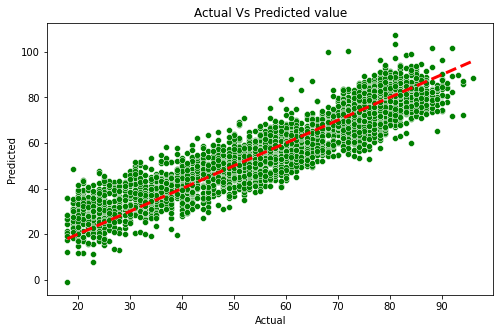

In [13]:
plt.figure(figsize=(8,5))
sns.scatterplot(y_train, y_pred_LR_train, color='green')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', color='red', lw = 3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual Vs Predicted value')

C:\Users\kunsa\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Actual Vs Predicted value')

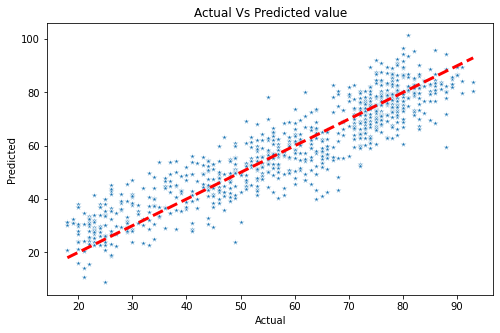

In [14]:
plt.figure(figsize=(8,5))
sns.scatterplot(y_test, y_pred_LR_test, alpha=1.0, marker="*")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color='red', lw = 3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual Vs Predicted value')